In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Lectura de datos extraidos de Spotify

In [2]:
df_tracks = pd.read_csv('2000-2022_all_tracks_final.csv', encoding='utf-8')

In [3]:
(df_tracks.shape)

(6274, 29)

In [4]:
# validando duplicados
df_tracks.drop_duplicates().shape

(6274, 29)

In [5]:
# eliminando columna id que esta duplicada con columna track_id
df_tracks.drop(columns=['id'], axis=1, inplace=True)

In [6]:
# validando nulos
pd.isnull(df_tracks).sum()

explicit                  0
track_id                  0
track_name                0
release_date              0
popularity_track          0
id_artist_1               0
name_artist_1             0
id_artist_2            4682
name_artist_2          4682
genres_artist_1           0
popularity_artist_1       0
followers_artist_1        0
genres_artist_2        4682
popularity_artist_2    4682
followers_artist_2     4682
danceability             40
energy                   40
key                      40
loudness                 40
mode                     40
speechiness              40
acousticness             40
instrumentalness         40
liveness                 40
valence                  40
tempo                    40
duration_ms              40
time_signature           40
dtype: int64

In [7]:
# eliminando tracks con caracteristicas nulas
df_tracks = df_tracks[~df_tracks['danceability'].isnull()]
df_tracks.shape

(6234, 28)

In [8]:
# validando nulos
pd.isnull(df_tracks).sum()


explicit                  0
track_id                  0
track_name                0
release_date              0
popularity_track          0
id_artist_1               0
name_artist_1             0
id_artist_2            4645
name_artist_2          4645
genres_artist_1           0
popularity_artist_1       0
followers_artist_1        0
genres_artist_2        4645
popularity_artist_2    4645
followers_artist_2     4645
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
time_signature            0
dtype: int64

In [11]:
# HASTA AQUI

### Exploracion de variables

In [52]:
df_tracks.dtypes

explicit                  bool
track_id                object
track_name              object
release_date            object
popularity_track         int64
id_artist_1             object
name_artist_1           object
id_artist_2             object
name_artist_2           object
genres_artist_1         object
popularity_artist_1      int64
followers_artist_1       int64
genres_artist_2         object
popularity_artist_2    float64
followers_artist_2     float64
danceability           float64
energy                 float64
key                    float64
loudness               float64
mode                   float64
speechiness            float64
acousticness           float64
instrumentalness       float64
liveness               float64
valence                float64
tempo                  float64
duration_ms            float64
time_signature         float64
dtype: object

In [54]:
# tracks mas populares del dataset

df_tracks.sort_values(by=['popularity_track'], ascending=False).head(5)

,explicit,track_id,track_name,release_date,popularity_track,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,popularity_artist_1,followers_artist_1,genres_artist_2,popularity_artist_2,followers_artist_2,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2898,True,2dHHgzDwk4BJdRwy9uXhTO,Creepin' (with The Weeknd & 21 Savage),2022-12-02,95,0iEtIxbK0KxaSlF7G42ZOp,Metro Boomin,NaN,NaN,['rap'],92,3655628,NaN,NaN,NaN,0.715,0.620,1.0,-6.005,0.0,0.0484,0.41700,0.000000,0.0822,0.172,97.950,221520.0,4.0
2756,False,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),2022-09-22,95,2wY79sveU1sp5g7SokKOiI,Sam Smith,3Xt3RrJMFv5SZkCfUE8C1J,Kim Petras,"['pop', 'uk pop']",90,21580325,"['dance pop', 'electropop', 'pop', 'post-teen ...",83.0,853920.0,0.714,0.472,2.0,-7.375,1.0,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943.0,4.0
2609,False,5ww2BF9slyYgNOk37BlC4u,La Bachata,2022-05-26,94,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,NaN,NaN,"['colombian pop', 'reggaeton', 'reggaeton colo...",86,11368558,NaN,NaN,NaN,0.835,0.679,7.0,-5.329,0.0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638.0,4.0
2704,True,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),2022-08-26,94,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,64M6ah0SkkRsnPGtGiRAbb,Bebe Rexha,"['big room', 'dance pop', 'edm', 'pop', 'pop d...",91,25425774,"['dance pop', 'edm', 'pop', 'post-teen pop']",85.0,7936367.0,0.561,0.965,7.0,-3.673,0.0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238.0,4.0
2614,False,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,93,716NhGYqD1jl2wI1Qkgq36,Bizarrap,52iwsT98xCoGgiGntTiR7K,Quevedo,"['argentine hip hop', 'pop venezolano', 'trap ...",90,8906553,"['rap canario', 'urbano latino']",90.0,1083220.0,0.621,0.782,2.0,-5.548,1.0,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938.0,4.0


In [55]:
# tracks menos populares del dataset

df_tracks.sort_values(by=['popularity_track'], ascending=True).head(5)

,explicit,track_id,track_name,release_date,popularity_track,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,popularity_artist_1,followers_artist_1,genres_artist_2,popularity_artist_2,followers_artist_2,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3122,False,2EEBcJeTTZ083bPzuosrVE,257Xixz,2020-07-01,0,3GHRK3b3SsHHnUqrEBTnvW,Low Skill Techno,NaN,NaN,[],0,2,NaN,NaN,NaN,0.949,0.39600,9.0,-14.794,0.0,0.0828,0.02270,0.02780,0.0996,0.3880,125.995,245714.0,5.0
3548,False,3jqFLx9THyJaoyGNzr5B4v,КрАЗ 255,2011-04-19,0,4OXVjz9BARB2MwT6sdx8JE,Шмели,NaN,NaN,[],8,650,NaN,NaN,NaN,0.286,0.96400,9.0,-2.122,1.0,0.1750,0.00259,0.00741,0.3440,0.1110,92.088,205573.0,4.0
3524,False,02vNPnwfqg6lkPEkALgslD,Movement 252,2022-12-22,0,7G8TTDUfcZMpNdRafCZk69,Alexander Silva,NaN,NaN,[],0,0,NaN,NaN,NaN,0.584,0.00334,0.0,-23.368,1.0,0.0681,0.99100,0.93900,0.0683,0.0789,136.438,468834.0,3.0
3517,True,3l1I8eFavXMA0zBF6l4BY4,25 Questions (21questions Remix),2021-08-18,0,7gLQGdzM3iw1pNQ191IL3F,Cleve YSB,NaN,NaN,[],0,0,NaN,NaN,NaN,0.703,0.64700,11.0,-10.670,0.0,0.3270,0.58000,0.00000,0.0474,0.8160,92.849,109656.0,4.0
3512,False,3ZYaqxpAS9y2FaCc3xccrK,Route 251,2006,0,1lgElpmd7RkWPKVas7DzKq,Jemima's Love,NaN,NaN,[],0,3,NaN,NaN,NaN,0.756,0.21000,0.0,-21.674,1.0,0.0729,0.84700,0.86100,0.1120,0.8100,121.630,140095.0,4.0


In [56]:
df_tracks.columns

Index(['explicit', 'track_id', 'track_name', 'release_date',
       'popularity_track', 'id_artist_1', 'name_artist_1', 'id_artist_2',
       'name_artist_2', 'genres_artist_1', 'popularity_artist_1',
       'followers_artist_1', 'genres_artist_2', 'popularity_artist_2',
       'followers_artist_2', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [57]:
# variables categoricas
df_tracks[['track_id', 'track_name', 'id_artist_1', 'name_artist_1', 'id_artist_2', 'name_artist_2', 'genres_artist_1', 'genres_artist_2', 'explicit']].head()

,track_id,track_name,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,genres_artist_2,explicit
0,696DnlkuDOXcMAnKlTgXXK,ROXANNE,0vRvGUQVUjytro0xpb26bs,Arizona Zervas,NaN,NaN,"['pop', 'pop rap', 'rhode island rap', 'viral ...",NaN,True
1,7k4t7uLgtOxPwTpFmtJNTY,Tusa,790FomKkXshlbRYZFtlgla,KAROL G,0hCNtLu0JehylgoiP8L4Gh,Nicki Minaj,"['reggaeton', 'reggaeton colombiano', 'urbano ...","['dance pop', 'hip pop', 'pop', 'queens hip ho...",False
2,2b8fOow8UzyDFAE27YhOZM,Memories,04gDigrS5kc9YWfZHwBETP,Maroon 5,NaN,NaN,['pop'],NaN,False
3,4TnjEaWOeW0eKTKIEvJyCa,Falling,7uaIm6Pw7xplS8Dy06V6pT,Trevor Daniel,NaN,NaN,"['melodic rap', 'pop', 'pop rap', 'viral rap']",NaN,False
4,21jGcNKet2qwijlDFuPiPb,Circles,246dkjvS1zLTtiykXe5h60,Post Malone,NaN,NaN,"['dfw rap', 'melodic rap', 'rap']",NaN,False


In [13]:
# numero de tracks con un artista
df_tracks[['track_id','id_artist_1']][~df_tracks['id_artist_1'].isnull()].shape

(6234, 2)

In [14]:
# numero de tracks con dos artistas
df_tracks[['track_id','id_artist_1']][(~df_tracks['id_artist_1'].isnull()) & (~df_tracks['id_artist_2'].isnull())].shape

(1589, 2)

In [58]:
# numero de aristas unicos
df_tracks['id_artist_1'].nunique()

2169

In [59]:
# numero de aristas unicos
df_tracks['id_artist_2'].nunique()

791

In [60]:
# tracks con dos artistas -> 30%
df_tracks[['id_artist_1']][~df_tracks['id_artist_1'].isnull() & ~df_tracks['id_artist_2'].isnull()].nunique()

id_artist_1    656
dtype: int64

In [61]:
# ambos artistas colaborados tienen generos similares
df_tracks[['track_id', 'genres_artist_1', 'genres_artist_2']][~df_tracks['id_artist_1'].isnull() & ~df_tracks['id_artist_2'].isnull()].groupby(['genres_artist_1', 
    'genres_artist_2']).count().sort_values(by='track_id', ascending=False)

,,track_id
genres_artist_1,genres_artist_2,
[],[],260
"['hoerspiel', 'writing']",[],43
['writing'],[],20
['german romanticism'],['nordic classical piano'],15
['video game music'],[],14
...,...,...
"['corrido', 'norteno', 'nueva musica mexicana', 'sad sierreno']","['corridos tumbados', 'musica mexicana', 'nueva musica mexicana', 'sad sierreno', 'sierreno']",1
"['corridos tumbados', 'sad sierreno']",['sad sierreno'],1
"['country', 'country rock', 'outlaw country', 'texas country']","['classic country pop', 'country', 'country rock', 'nashville sound', 'outlaw country', 'singer-songwriter', 'texas country']",1


In [62]:
# numero de generos
df_tracks['genres_artist_1'].nunique()

1221

In [63]:
# 962 tracks con un artista 1 sin genero
df_tracks[['track_id', 'genres_artist_1']].groupby(['genres_artist_1']).count().sort_values(['track_id'], ascending=False)

,track_id
genres_artist_1,
[],951
['pop'],172
"['dance pop', 'pop']",89
"['reggaeton', 'trap latino', 'urbano latino']",83
"['hoerspiel', 'writing']",72
...,...
"['dance pop', 'edm', 'pop', 'pop dance', 'post-teen pop', 'tropical house', 'uk pop']",1
"['dance pop', 'edm', 'pop', 'pop dance', 'scandipop', 'tropical house']",1
"['dance pop', 'edm', 'pop', 'post-teen pop']",1


In [64]:
# 34 tracks con un artista 1 sin genero, pero tienen artista 2 con genero
df_tracks[(df_tracks['genres_artist_1']=='[]') & (~df_tracks['genres_artist_2'].isnull()) & (df_tracks['genres_artist_2'] != '[]')].shape

(34, 28)

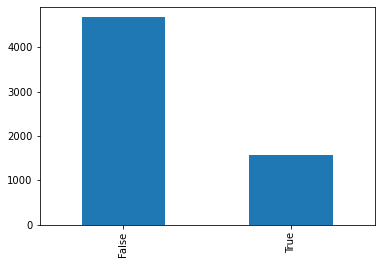

In [65]:
# variable explicit, valores True/False
df_tracks['explicit'].value_counts().plot(kind='bar');

In [66]:
# variables numericas de artistas
df_tracks[['popularity_artist_1', 'followers_artist_1','popularity_artist_2', 'followers_artist_2']].head()

,popularity_artist_1,followers_artist_1,popularity_artist_2,followers_artist_2
0,68,701427,NaN,NaN
1,87,31789223,87.0,27271132.0
2,87,39483004,NaN,NaN
3,68,735839,NaN,NaN
4,89,39542755,NaN,NaN


In [67]:
df_tracks[['popularity_artist_1', 'followers_artist_1','popularity_artist_2', 'followers_artist_2']].describe()

,popularity_artist_1,followers_artist_1,popularity_artist_2,followers_artist_2
count,6234.000000,6.234000e+03,1589.000000,1.589000e+03
mean,64.491017,1.132784e+07,62.587162,7.696616e+06
std,24.794034,2.038296e+07,23.422808,1.674079e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,48.000000,2.367950e+04,48.000000,8.420000e+02
50%,70.000000,1.431658e+06,65.000000,2.255180e+05
75%,84.000000,1.184167e+07,83.000000,7.464302e+06
max,100.000000,1.087952e+08,100.000000,1.087952e+08


c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Artist 1 Distribution')

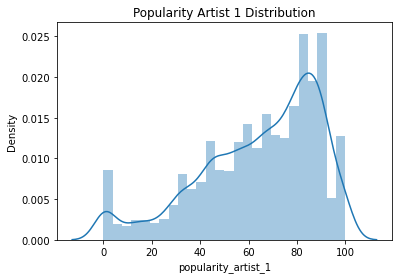

In [15]:
sns.distplot(df_tracks['popularity_artist_1']).set_title('Popularity Artist 1 Distribution')

c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Followers Artist 1 Distribution')

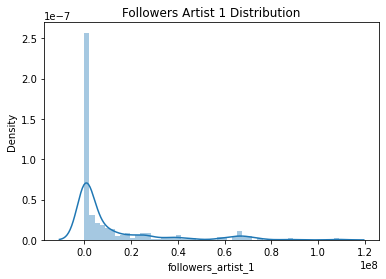

In [16]:
sns.distplot(df_tracks['followers_artist_1']).set_title('Followers Artist 1 Distribution')

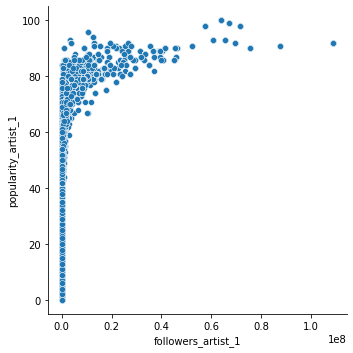

In [68]:
sns.relplot(x="followers_artist_1", y="popularity_artist_1", data=df_tracks)

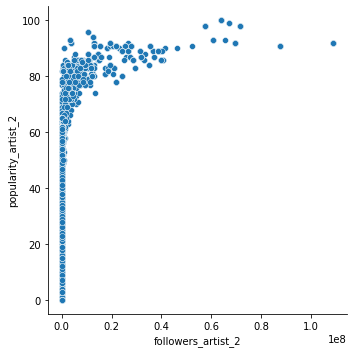

In [96]:
sns.relplot(x="followers_artist_2", y="popularity_artist_2", data=df_tracks)

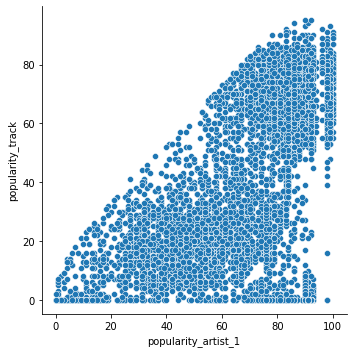

In [97]:
sns.relplot(x="popularity_artist_1", y="popularity_track", data=df_tracks)

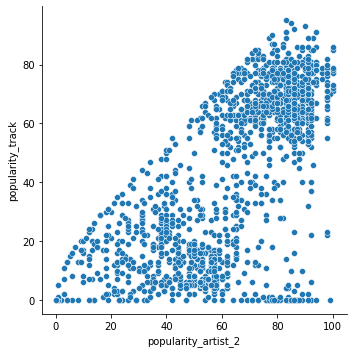

In [98]:
sns.relplot(x="popularity_artist_2", y="popularity_track", data=df_tracks)

In [70]:
# variables numericas de caracteristicas de tracks
df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636.0,5.0
1,0.803,0.715,2.0,-3.280,1.0,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960.0,4.0
2,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486.0,4.0
3,0.785,0.431,10.0,-8.756,0.0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382.0,4.0
4,0.695,0.762,0.0,-3.497,1.0,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280.0,4.0


In [71]:
df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6.234000e+03,6234.000000
mean,0.610124,0.553773,5.240456,-9.992495,0.634905,0.189955,0.360111,0.128169,0.224189,0.474725,118.753399,2.138498e+05,3.854828
std,0.184387,0.242178,3.611099,6.736634,0.481495,0.271972,0.325681,0.293350,0.204136,0.251002,31.028264,1.310681e+05,0.600233
min,0.000000,0.000000,0.000000,-49.258000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.263500e+04,0.000000
25%,0.498000,0.387000,2.000000,-12.443000,0.000000,0.040400,0.060925,0.000000,0.100000,0.280000,94.498750,1.670765e+05,4.000000
50%,0.643000,0.588000,5.000000,-7.607000,1.000000,0.063450,0.261000,0.000003,0.136000,0.469500,117.975000,1.935190e+05,4.000000
75%,0.742000,0.738000,8.000000,-5.527500,1.000000,0.194000,0.623750,0.002972,0.280750,0.668000,139.986000,2.352842e+05,4.000000
max,0.985000,1.000000,11.000000,1.509000,1.000000,0.970000,0.996000,1.000000,0.997000,1.000000,214.019000,4.100180e+06,5.000000


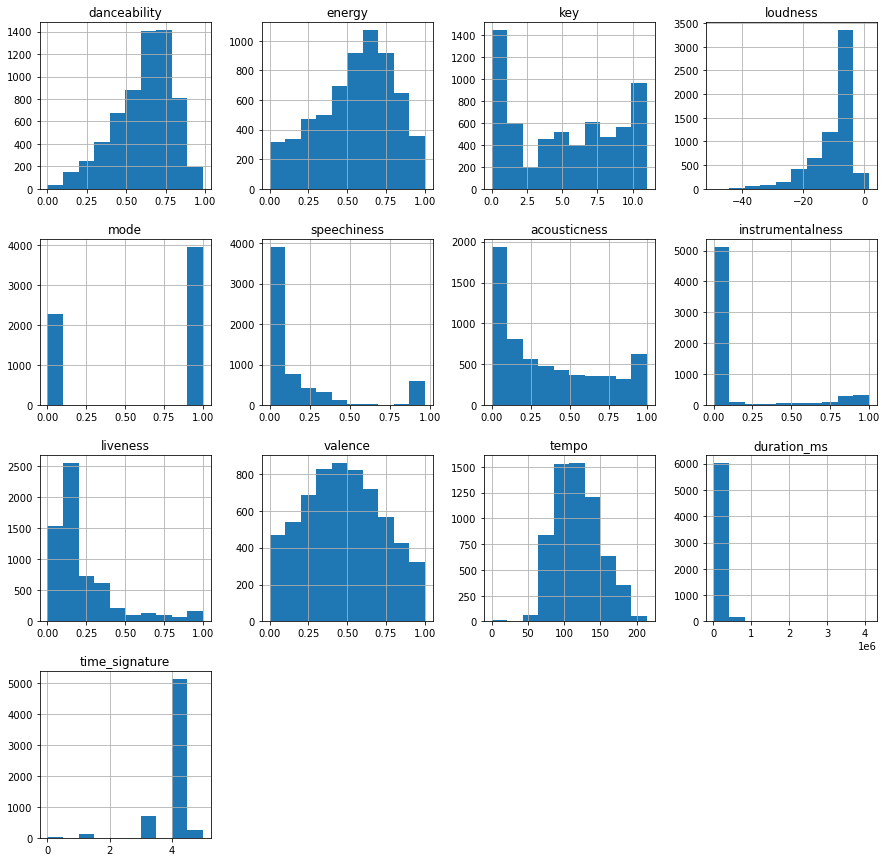

In [72]:
# histograma de variables

df_tracks[['danceability', 'energy','key', 'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 
'time_signature']].hist(figsize=(15, 15))
plt.show()

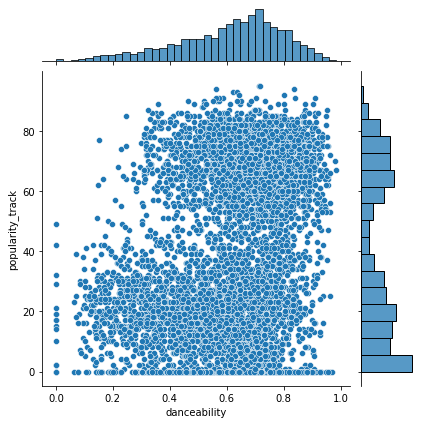

In [101]:
sns.jointplot(x="danceability", y="popularity_track", data=df_tracks)

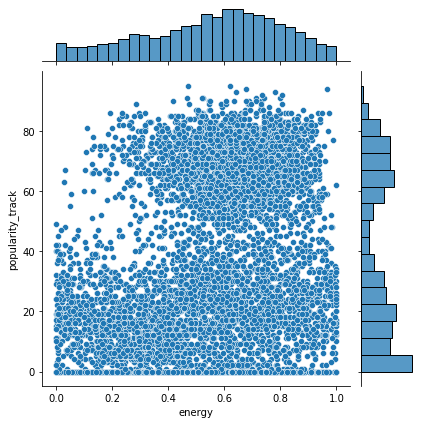

In [102]:
sns.jointplot(x="energy", y="popularity_track", data=df_tracks)

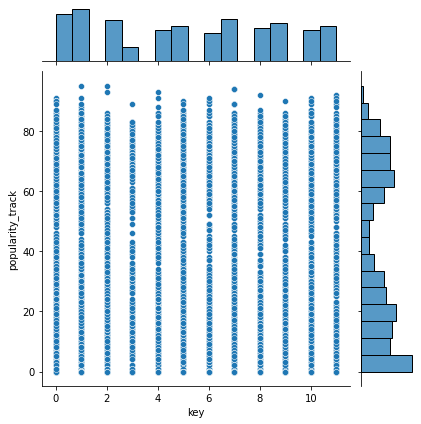

In [103]:
sns.jointplot(x="key", y="popularity_track", data=df_tracks)

<AxesSubplot:>

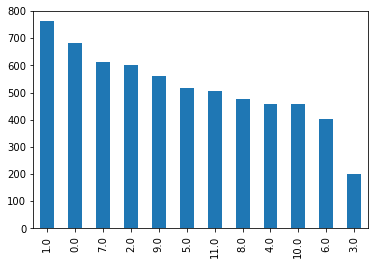

In [104]:
# variable explicit, valores categóricos
df_tracks['key'].value_counts().plot(kind='bar')

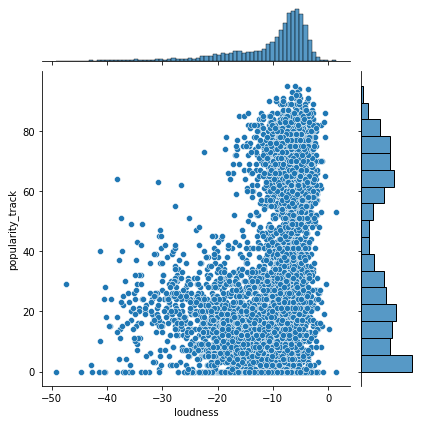

In [105]:
sns.jointplot(x="loudness", y="popularity_track", data=df_tracks)

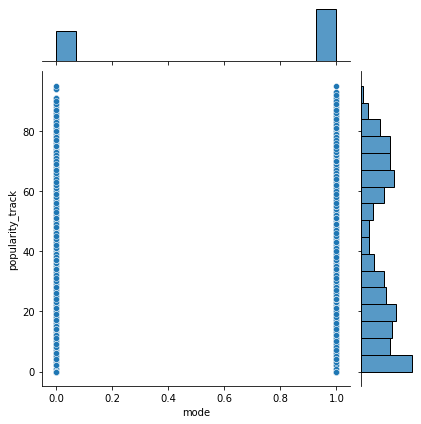

In [106]:
sns.jointplot(x="mode", y="popularity_track", data=df_tracks)

<AxesSubplot:>

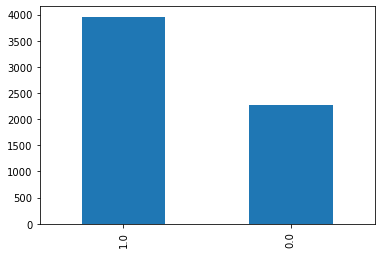

In [107]:
# variable mode, valores categóricos 
df_tracks['mode'].value_counts().plot(kind='bar')

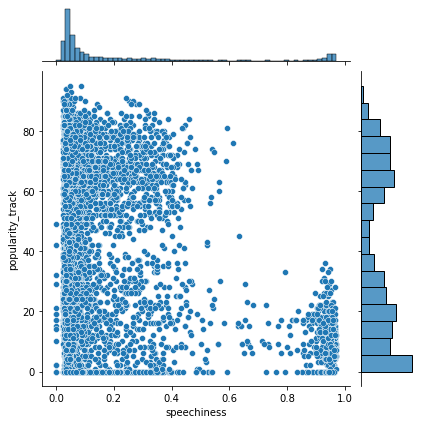

In [108]:
sns.jointplot(x="speechiness", y="popularity_track", data=df_tracks)

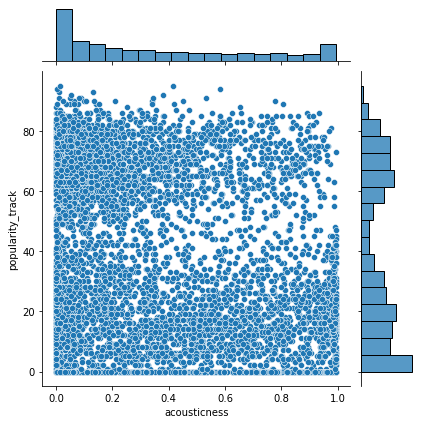

In [109]:
sns.jointplot(x="acousticness", y="popularity_track", data=df_tracks)

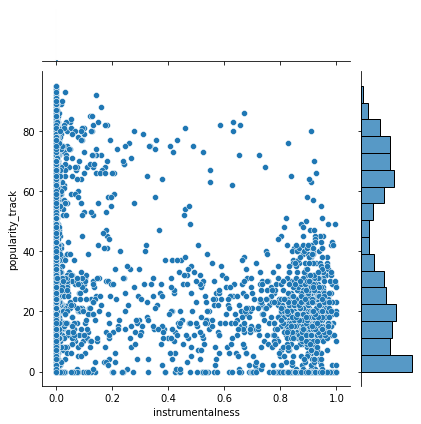

In [110]:
sns.jointplot(x="instrumentalness", y="popularity_track", data=df_tracks)

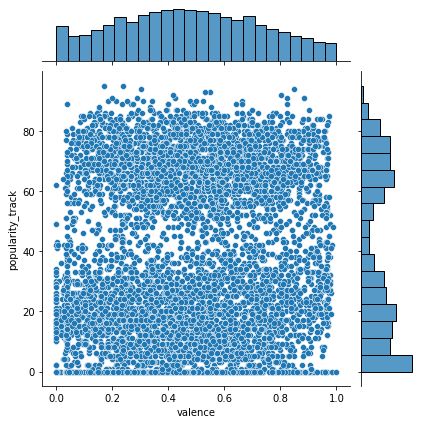

In [111]:
sns.jointplot(x="valence", y="popularity_track", data=df_tracks)

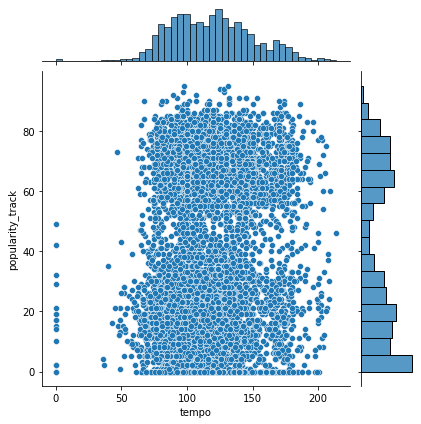

In [112]:
sns.jointplot(x="tempo", y="popularity_track", data=df_tracks)

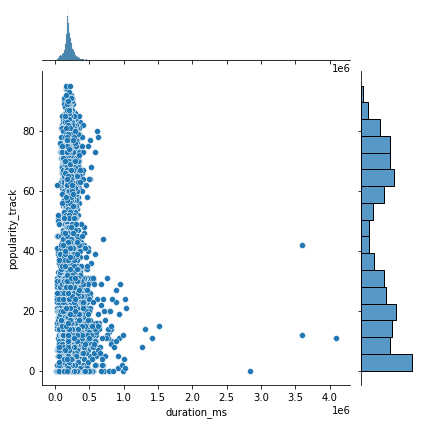

In [113]:
sns.jointplot(x="duration_ms", y="popularity_track", data=df_tracks)

<AxesSubplot:>

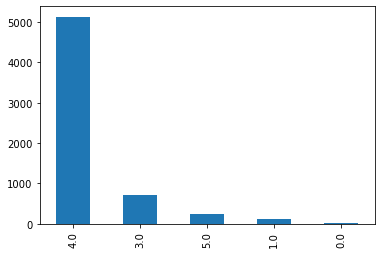

In [114]:
# variable time_signature, valores categóricos 
df_tracks['time_signature'].value_counts().plot(kind='bar')

In [11]:
# variable time_signature, valores categóricos 
df_tracks['key'].unique()

array([ 6.,  2., 11., 10.,  0.,  1.,  9.,  7.,  8.,  4.,  5.,  3.])

<AxesSubplot:>

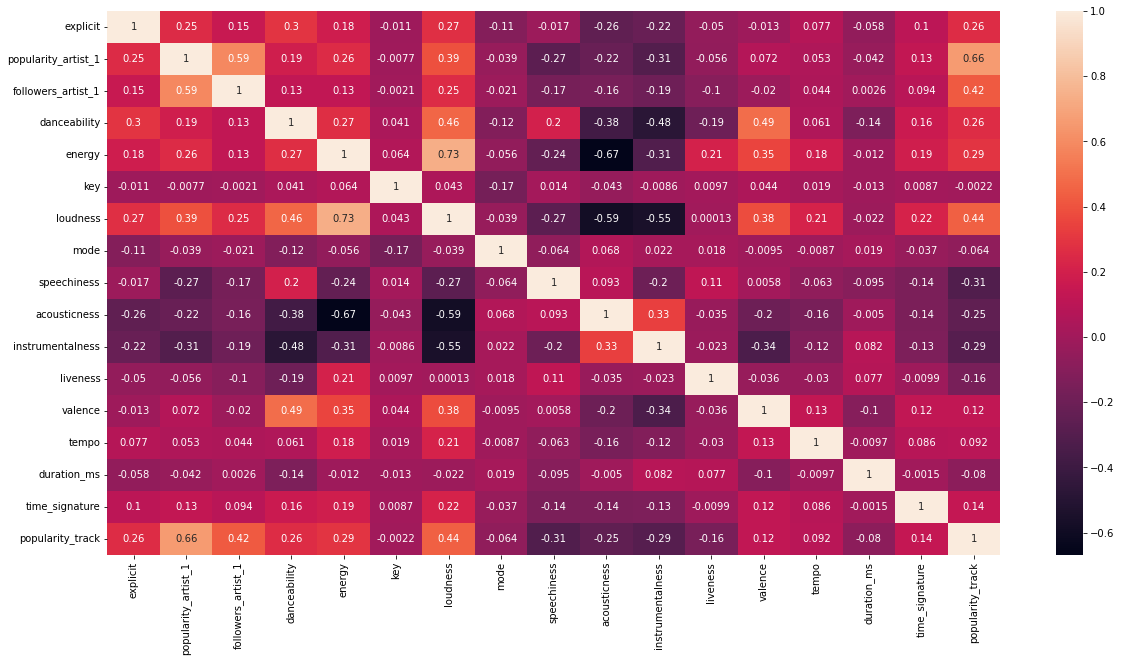

In [19]:
# generando matriz correlaciones, se descartan variables asociadas al segundo artista asociada a una cancion

plt.figure(figsize=(20, 10))
sns.heatmap(df_tracks[['explicit', 'track_id', 'track_name', 'release_date',
       'id_artist_1', 'name_artist_1', 'genres_artist_1', 'popularity_artist_1', 
       'followers_artist_1', 'danceability', 'energy', 'key', 'loudness', 'mode', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
       'duration_ms', 'time_signature', 'popularity_track']].corr(),annot = True)

In [21]:
# metodo para generar diagrama de una regresión lineal de la probabilidad dado una variable
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    '''Plots a scatterplot with a regression line
    using given inputs'''
    data = data.groupby(x)[y].mean().to_frame().reset_index()
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'b', "s": 10}, line_kws={'color':'black'} )
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14, c='blue')
    _ = plt.ylim(-3, 103)
    plt.show()


##### Analizando variables mas correladas a la variable objetivo

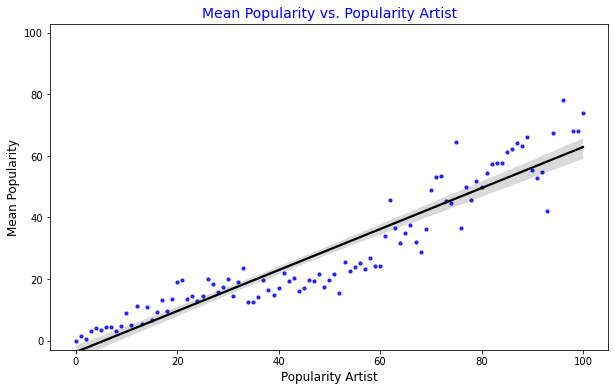

In [24]:
regress_plot(x='popularity_artist_1', y='popularity_track', data=df_tracks, xlab='Popularity Artist', 
ylab='Mean Popularity', titl='Mean Popularity vs. Popularity Artist')

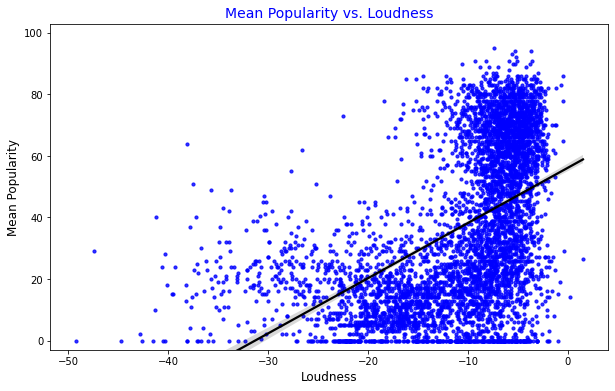

In [ ]:
regress_plot(x='loudness', y='popularity_track', data=df_tracks, xlab='Loudness', ylab='Mean Popularity',
 titl='Mean Popularity vs. Loudness')

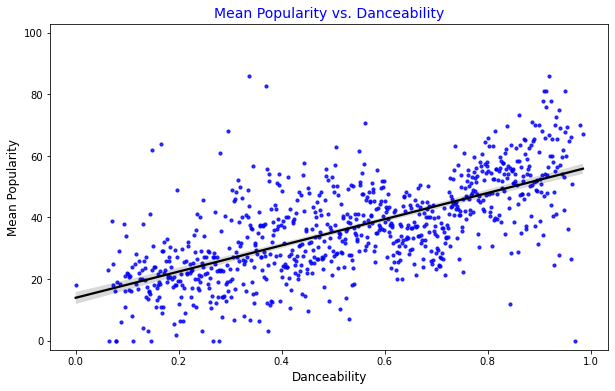

In [ ]:
regress_plot(x='danceability', y='popularity_track', data=df_tracks, xlab='Danceability', 
ylab='Mean Popularity', titl='Mean Popularity vs. Danceability')

<AxesSubplot:xlabel='mode', ylabel='popularity_track'>

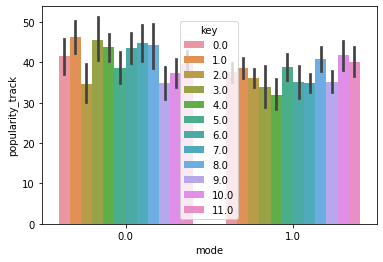

In [ ]:
# combiando mode y key que estan relacionadas en la composicion musical
sns.barplot(x = 'mode', y = 'popularity_track', hue = 'key', data = df_tracks)

c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

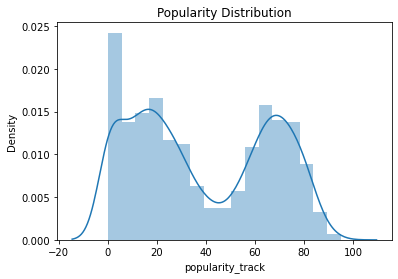

In [27]:
sns.distplot(df_tracks['popularity_track']).set_title('Popularity Distribution')

In [28]:
# Eliminando eliminando muestras con popularidad 6

df_tracks[['popularity_track']][df_tracks['popularity_track'] == 0].count()

popularity_track    526
dtype: int64

In [29]:
# eliminando registros de tracks con popularidad 0 porque tiene un numero mayor al resto de popularidad
import random
df_tracks_0 = df_tracks[df_tracks['popularity_track'] == 0].sample(n=150, random_state=1)
df_tracks_resto = df_tracks[(df_tracks['popularity_track'] > 0)]
df_tracks = pd.concat([df_tracks_0, df_tracks_resto])

c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

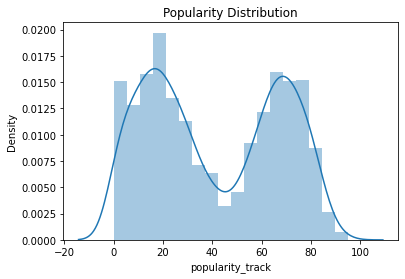

In [30]:
sns.distplot(df_tracks['popularity_track']).set_title('Popularity Distribution')

### Transformado variables categoricas

In [31]:
# extraer año de publicacion

df_tracks['release_year'] = df_tracks['release_date'].str[0:4]
df_tracks['release_year'] = df_tracks['release_year'].astype('int')

In [193]:
df_tracks.head()

,explicit,track_id,track_name,release_date,popularity_track,id_artist_1,name_artist_1,id_artist_2,name_artist_2,genres_artist_1,popularity_artist_1,followers_artist_1,genres_artist_2,popularity_artist_2,followers_artist_2,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_year
0,True,696DnlkuDOXcMAnKlTgXXK,ROXANNE,2019-10-10,75,0vRvGUQVUjytro0xpb26bs,Arizona Zervas,NaN,NaN,"['pop', 'pop rap', 'rhode island rap', 'viral ...",68,701427,NaN,NaN,NaN,0.621,0.601,6.0,-5.616,0.0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636.0,5.0,2019
1,False,7k4t7uLgtOxPwTpFmtJNTY,Tusa,2019-11-07,74,790FomKkXshlbRYZFtlgla,KAROL G,0hCNtLu0JehylgoiP8L4Gh,Nicki Minaj,"['reggaeton', 'reggaeton colombiano', 'urbano ...",87,31789223,"['dance pop', 'hip pop', 'pop', 'queens hip ho...",87.0,27271132.0,0.803,0.715,2.0,-3.280,1.0,0.2980,0.2950,0.000134,0.0574,0.574,101.085,200960.0,4.0,2019
2,False,2b8fOow8UzyDFAE27YhOZM,Memories,2019-09-20,28,04gDigrS5kc9YWfZHwBETP,Maroon 5,NaN,NaN,['pop'],87,39483004,NaN,NaN,NaN,0.764,0.320,11.0,-7.209,1.0,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486.0,4.0,2019
3,False,4TnjEaWOeW0eKTKIEvJyCa,Falling,2018-10-05,3,7uaIm6Pw7xplS8Dy06V6pT,Trevor Daniel,NaN,NaN,"['melodic rap', 'pop', 'pop rap', 'viral rap']",68,735839,NaN,NaN,NaN,0.785,0.431,10.0,-8.756,0.0,0.0364,0.1230,0.000000,0.0887,0.236,127.085,159382.0,4.0,2018
4,False,21jGcNKet2qwijlDFuPiPb,Circles,2019-09-06,83,246dkjvS1zLTtiykXe5h60,Post Malone,NaN,NaN,"['dfw rap', 'melodic rap', 'rap']",89,39542755,NaN,NaN,NaN,0.695,0.762,0.0,-3.497,1.0,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280.0,4.0,2019


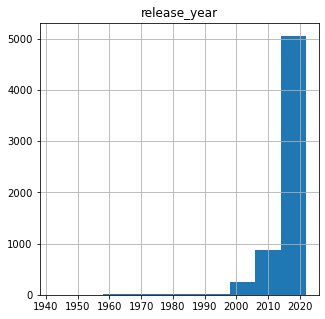

In [194]:
df_tracks[['release_year']].hist(figsize=(5, 5))
plt.show()

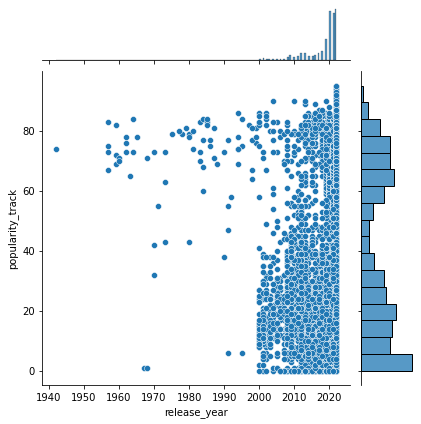

In [195]:
sns.jointplot(x="release_year", y="popularity_track", data=df_tracks)

In [196]:
df_tracks['release_year'].describe()

count    6234.00000
mean     2017.57411
std         6.62897
min      1942.00000
25%      2016.00000
50%      2020.00000
75%      2021.00000
max      2022.00000
Name: release_year, dtype: float64

In [197]:
#Tranformando variables categoricas
df_tracks['key'] = df_tracks['key'].astype('category')
df_tracks['mode'] = df_tracks['mode'].astype('category')
df_tracks['time_signature'] = df_tracks['time_signature'].astype('category')

In [198]:
#listado de columnas a incluir en el modelo
col_caract = ['danceability', 'duration_ms', 'energy', 'instrumentalness', 'speechiness', 'liveness', 'explicit', 'key', 
       'loudness', 'mode', 'valence', 'tempo', 'time_signature', 'release_year', 'followers_artist_1']

##### Realizando one hot encoding de variables categoricas

In [199]:
df_tracks_tmp = pd.get_dummies(df_tracks[col_caract])
df_tracks_tmp.head()

,danceability,duration_ms,energy,instrumentalness,speechiness,liveness,explicit,loudness,valence,tempo,release_year,followers_artist_1,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,0.621,163636.0,0.601,0.000000,0.1480,0.4600,True,-5.616,0.457,116.735,2019,701427,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0.803,200960.0,0.715,0.000134,0.2980,0.0574,False,-3.280,0.574,101.085,2019,31789223,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.764,189486.0,0.320,0.000000,0.0546,0.0822,False,-7.209,0.575,91.019,2019,39483004,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,0.785,159382.0,0.431,0.000000,0.0364,0.0887,False,-8.756,0.236,127.085,2018,735839,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0.695,215280.0,0.762,0.002440,0.0395,0.0863,False,-3.497,0.553,120.042,2019,39542755,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [201]:
from pandas.api.types import is_numeric_dtype

num_cols = [col for col in df_tracks.columns if is_numeric_dtype(df_tracks[col])]
num_cols

['explicit',
 'popularity_track',
 'popularity_artist_1',
 'followers_artist_1',
 'popularity_artist_2',
 'followers_artist_2',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'release_year']

### Transformado variables numericas

In [202]:
# cambiado duracion a minutos 

df_tracks_tmp['duration_m'] = round(df_tracks_tmp['duration_ms']/60000, 2)
df_tracks_tmp.head()

,danceability,duration_ms,energy,instrumentalness,speechiness,liveness,explicit,loudness,valence,tempo,release_year,followers_artist_1,key_0.0,key_1.0,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,mode_0.0,mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0,duration_m
0,0.621,163636.0,0.601,0.000000,0.1480,0.4600,True,-5.616,0.457,116.735,2019,701427,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2.73
1,0.803,200960.0,0.715,0.000134,0.2980,0.0574,False,-3.280,0.574,101.085,2019,31789223,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.35
2,0.764,189486.0,0.320,0.000000,0.0546,0.0822,False,-7.209,0.575,91.019,2019,39483004,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,3.16
3,0.785,159382.0,0.431,0.000000,0.0364,0.0887,False,-8.756,0.236,127.085,2018,735839,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,2.66
4,0.695,215280.0,0.762,0.002440,0.0395,0.0863,False,-3.497,0.553,120.042,2019,39542755,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.59


c:\Users\cbaut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


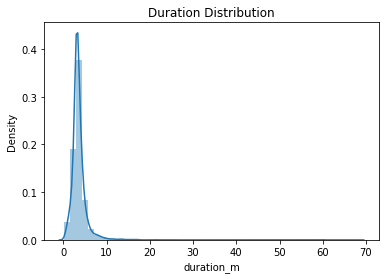

In [203]:
sns.distplot(df_tracks_tmp['duration_m']).set_title('Duration Distribution');

In [204]:
# eliminando duracion en milisegundos

df_tracks_tmp.drop(['duration_ms'], axis=1, inplace=True)

In [205]:
df_tracks_tmp.shape

(6234, 31)

In [206]:
df_tracks_tmp.columns

Index(['danceability', 'energy', 'instrumentalness', 'speechiness', 'liveness',
       'explicit', 'loudness', 'valence', 'tempo', 'release_year',
       'followers_artist_1', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0',
       'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0',
       'key_10.0', 'key_11.0', 'mode_0.0', 'mode_1.0', 'time_signature_0.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0', 'duration_m'],
      dtype='object')

In [207]:
#Escalando variables 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy= True, with_mean=True, with_std=True)
df_scaler = scaler.fit_transform(df_tracks_tmp)

In [209]:
df_scaler

array([[ 0.05898735,  0.19502659, -0.43694962, ..., -2.154444  ,
         4.86213083, -0.38187304],
       [ 1.04612039,  0.66579212, -0.43649279, ...,  0.46415688,
        -0.20567114, -0.09803323],
       [ 0.83459188, -0.96536916, -0.43694962, ...,  0.46415688,
        -0.20567114, -0.1850164 ],
       ...,
       [ 0.33017774,  1.05809673, -0.43694553, ...,  0.46415688,
        -0.20567114, -0.53294906],
       [-0.57017437, -0.16837137, -0.43694962, ...,  0.46415688,
        -0.20567114,  0.97323314],
       [ 0.29221109, -0.93233298, -0.43694962, ...,  0.46415688,
        -0.20567114, -0.25368732]])